In [1]:
import pandas as pd
import numpy as np
import pypsa

from pathlib import Path

In [2]:
path = Path.cwd().parent / 'resources' / 'networks'

In [3]:
from pathlib import Path
import geopandas as gpd

eso = gpd.read_file(Path.cwd().parent / 'data' / 'eso_zonal_shapes.geojson')
eso = eso.set_index("name")
eso = eso.loc[eso.index.str.contains("GB")]
# eso.to_file(Path.cwd().parent / 'data' / 'eso_zones.geojson', driver='GeoJSON')

fti = gpd.read_file(Path.cwd().parent / 'data' / 'fti_zonal_shapes.geojson')
fti = fti.rename(columns={"NEW_ZONE1": "name"}).set_index("name")[["geometry"]].set_crs("EPSG:27700").to_crs("EPSG:4326")

In [4]:
def make_busmap(n, zones):
    df = gpd.GeoDataFrame(
        index=n.buses.index,
        geometry=gpd.points_from_xy(n.buses.x, n.buses.y),
        crs="EPSG:4326",
        )

    return gpd.sjoin(df, zones, how="left", op="within").rename(columns={"index_right": 0})[0]

print(make_busmap(n, fti))


NameError: name 'n' is not defined

In [7]:
import pypsa
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from pathlib import Path

In [23]:
fti = gpd.read_file(Path.cwd().parent / 'resources' / 'regions_onshore_elec_2024-03-02_35_s_fti.geojson')
eso = gpd.read_file(Path.cwd().parent / 'resources' / 'regions_onshore_elec_2024-03-02_35_s_eso.geojson')
nodal = gpd.read_file(Path.cwd().parent / 'resources' / 'regions_onshore_2024-03-02_35_s.geojson')

fti_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35_s_fti.nc')
eso_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35_s_eso.nc')
nodal_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35_s.nc')

INFO:pypsa.io:Imported network prepared_live_2024-03-02_35_s_fti.nc has buses, carriers, generators, lines, links, loads
INFO:pypsa.io:Imported network prepared_live_2024-03-02_35_s_eso.nc has buses, carriers, generators, lines, links, loads
INFO:pypsa.io:Imported network prepared_live_2024-03-02_35_s.nc has buses, carriers, generators, lines, links, loads


In [40]:
fti_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35_s_fti.nc')
eso_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35_s_eso.nc')
nodal_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35_s.nc')

def fixed_solve(n):
    n.generators.loc[:, "p_nom"] *= n.loads.p_set.sum() / n.generators.p_nom.sum() * 8
    n.optimize(solver_name="gurobi")

fixed_solve(nodal_n)
fixed_solve(eso_n)
fixed_solve(fti_n)

INFO:pypsa.io:Imported network prepared_live_2024-03-02_35_s_fti.nc has buses, carriers, generators, lines, links, loads
INFO:pypsa.io:Imported network prepared_live_2024-03-02_35_s_eso.nc has buses, carriers, generators, lines, links, loads
INFO:pypsa.io:Imported network prepared_live_2024-03-02_35_s.nc has buses, carriers, generators, lines, links, loads
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-vdiaeyqh.lp
Reading time = 0.02 seconds
obj: 1622 rows, 592 columns, 3654 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 1622 rows, 592 columns and 3654 nonzeros
Model fingerprint: 0xf950f8a2
Coefficient statistics:
  Matrix range     [5e-03, 5e+01]
  Objective range  [1e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 4e+04]
Presolve removed 1393 rows and 282 columns
Presolve time: 0.01s
Presolved: 229 rows, 310 columns, 1565 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.643549e+05   0.000000e+00      0s
     180    1.7585968e+05   0.000000e+00   0.000000e+0

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 592 primals, 1622 duals
Objective: 1.76e+05
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Da

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-8t2h_gkn.lp
Reading time = 0.02 seconds
obj: 266 rows, 119 columns, 420 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 266 rows, 119 columns and 420 nonzeros
Model fingerprint: 0x76c03449
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e+00, 4e+04]
Presolve removed 238 rows and 55 columns
Presolve time: 0.02s
Presolved: 28 rows, 64 columns, 127 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.187121e+04   0.000000e+00      0s
      22    4.3843151e+02   0.000000e+00   0.000000e+00      0s

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 119 primals, 266 duals
Objective: 4.38e+02
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dat

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-js00bswk.lp
Reading time = 0.02 seconds
obj: 154 rows, 73 columns, 230 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 154 rows, 73 columns and 230 nonzeros
Model fingerprint: 0xbce809db
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [1e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e+00, 4e+04]
Presolve removed 149 rows and 59 columns
Presolve time: 0.02s
Presolved: 5 rows, 14 columns, 21 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1721402e+01   5.548858e+03   0.000000e+00      0s
       4    4.3843151e+02   0.000000e+00   0.000000e+00      0s

So

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 73 primals, 154 duals
Objective: 4.38e+02
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


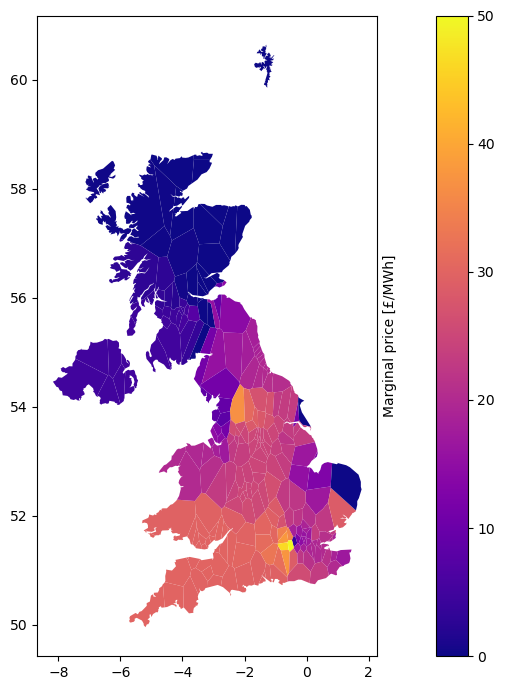

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

vmaxes = {
    "fti": 6000,
    "eso": 2000,
    "nodal": 100,
}

def zones_to_ax(n, zones, ax):# , vmax):

    # print(n.buses_t.marginal_price)
    price = n.buses_t.marginal_price.T
    price.columns = ["marginal_price"]

    merged = pd.concat((zones.set_index("name"), price), axis=1)
    cbar = merged.plot(column="marginal_price", ax=ax, legend=True, cmap="plasma", vmax=50, vmin=0)
    ax.yaxis.set_label_position("right")
    ax.set_ylabel("Marginal price [£/MWh]")


zones_to_ax(nodal_n, nodal, ax)#, vmaxes["nodal"])

plt.tight_layout()
plt.show()

In [46]:
nodal_n

{'p_min_pu': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'p_max_pu': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'p_set': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'q_set': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'marginal_cost': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'marginal_cost_quadratic': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'efficiency': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'stand_by_cost': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'p': Generator              4950 PV  4956 battery  4956 offwind  4960 nuclear  \
 snapshot                                                                   
 2024-02-20 00:30:00  17.748209           0.0    417.082919           0.0   
 
 Generator            4967 biomass  4969 gas  4969 interconnector  4970 gas  \
 snapshot                                                                     